<a href="https://colab.research.google.com/github/Tookss55/DS/blob/main/Unit6/Unit6ExercisesSF_Amir_Regan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

Answer1:

elpd_loo wouldn't do anything if we only have one model becasue elpd_loo compares two different performance models and tells us which one is more accurate.

**Task2**:

Describe overfitting, in the context of this course

Answer2: Overfitting is when the model tries to predict the data we have on hand well but the predictions can't generalize similar data. The model doesn't allow enough room to adapt to reality.

**Task3**:

How do we mitigate overfitting?

Answer3:
Priors are the best way to prevent overfitting. Specifically using weak priors helps as it loosens the regulations. Diversifying the data and reducing the number of variables can also hep to mitiage overfitting.

**Task4**:

How do we mitigate underfitting?

Answer4: Using elpd_loo to pick between multiple models is the best way to mitigate undefitting. We can also use causal diagrams to mitgate underfitting.

**Task5**:

Why would we want more than one predictor in a model?

Answer5: Because if there are multiple variables that affect the response variable the higher elpd_loo will be and the better the model will be compared to a model that only uses one model.

**Task6**:

Can we have too many predictors? How would we know?

Answer6: It's possible to have too many predictors because an excess number of predictors can lead to overfitting, which is when the model cannot make accurate predictions outside of the observed data. It's clear if a model is overfitting becaise you can see if it predicts test data outside the observed data well. If it doesn't, the problem is probably overfitting.

**Task7**:

What is variable selection, and how does it work?

Answer7:

Variable selection is the process of picking useful predictors for a model. It helps us figure out how many predictors we need and which ones are best. It compares the elpd_loos of different models with each other to find out which one is best. Diagrams are one of the best ways to do variable selection because they visualize predictors in an organized way, and how the predictors are connected.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Answer9: In a linear regression with one categorical and one quantitative predictor, the standard model gives each category a different intercept but assumes a single shared slope across all categories. Using the categorical variable as a hierarchy allows both intercepts and slopes to differ by category, though the slopes are constrained to stay near a common overall trend. Adding an interaction between the categorical and quantitative predictors provides the most flexibility, allowing each category to have its own intercept and slope without relying on a global slope, making the relationships between variables as different as possible within a single model.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [22]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import graphviz as gv

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

In [6]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [7]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
#Predictors free throw percentage and position (with position as a categorical predictor)
model_basketball = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

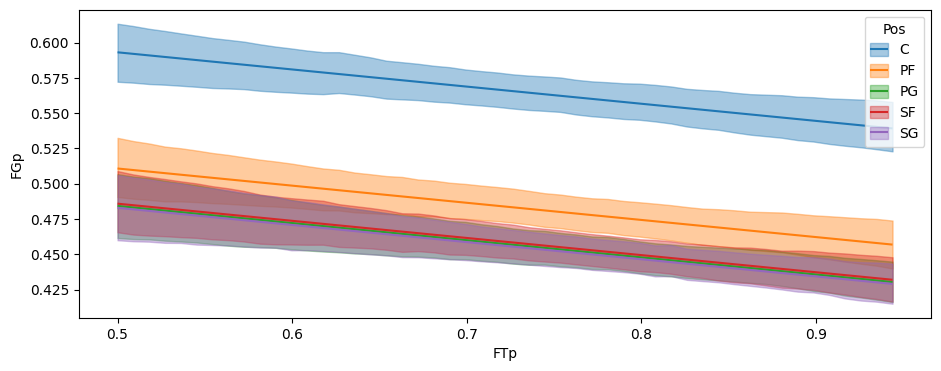

In [9]:
bmb.interpret.plot_predictions(model_basketball,
                               idata_basketball,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
#predictors free throw percentage and position (with position as a hierarchy)
model_basketball_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

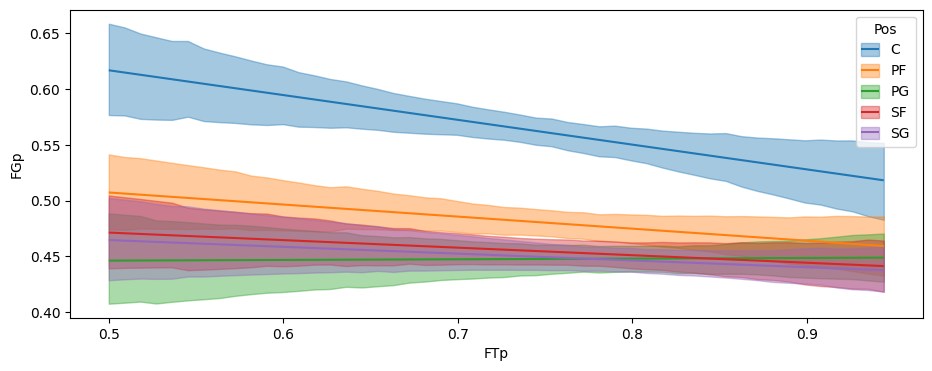

In [11]:
bmb.interpret.plot_predictions(model_basketball_h,
                               idata_basketball_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
#predictors free throw percentage and position (with position interacting with frew throw percentage)
model_bb_interq = bmb.Model("`FGp` ~ `FTp` + `Pos` + `FTp`:`Pos`", data=bb)
idata_bb_interq = model_bb_interq.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

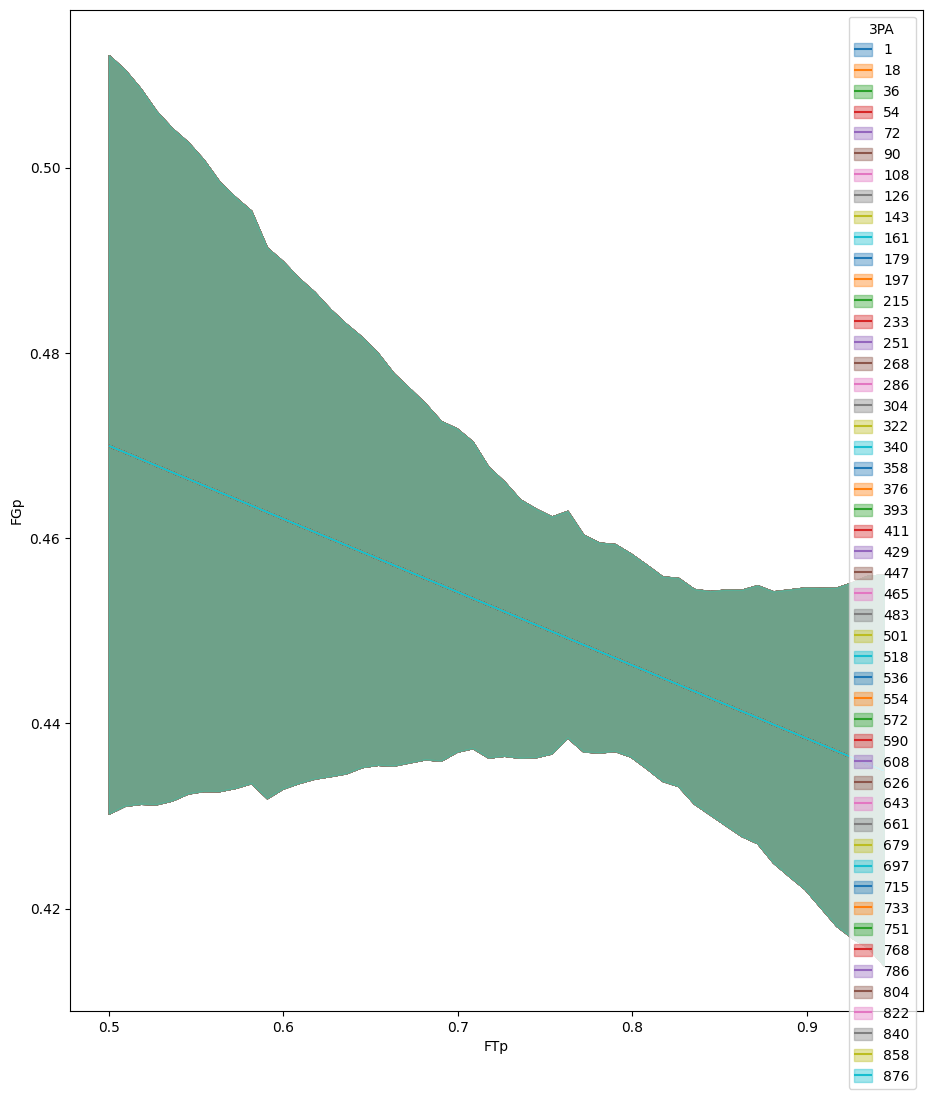

In [13]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

In [ ]:
#predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
model_bb_4 = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `FTp`:`3PA` + `FTp`:`Pos` + `3PA` : `Pos`", data=bb)
idata_bb_4 = model_bb_4.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

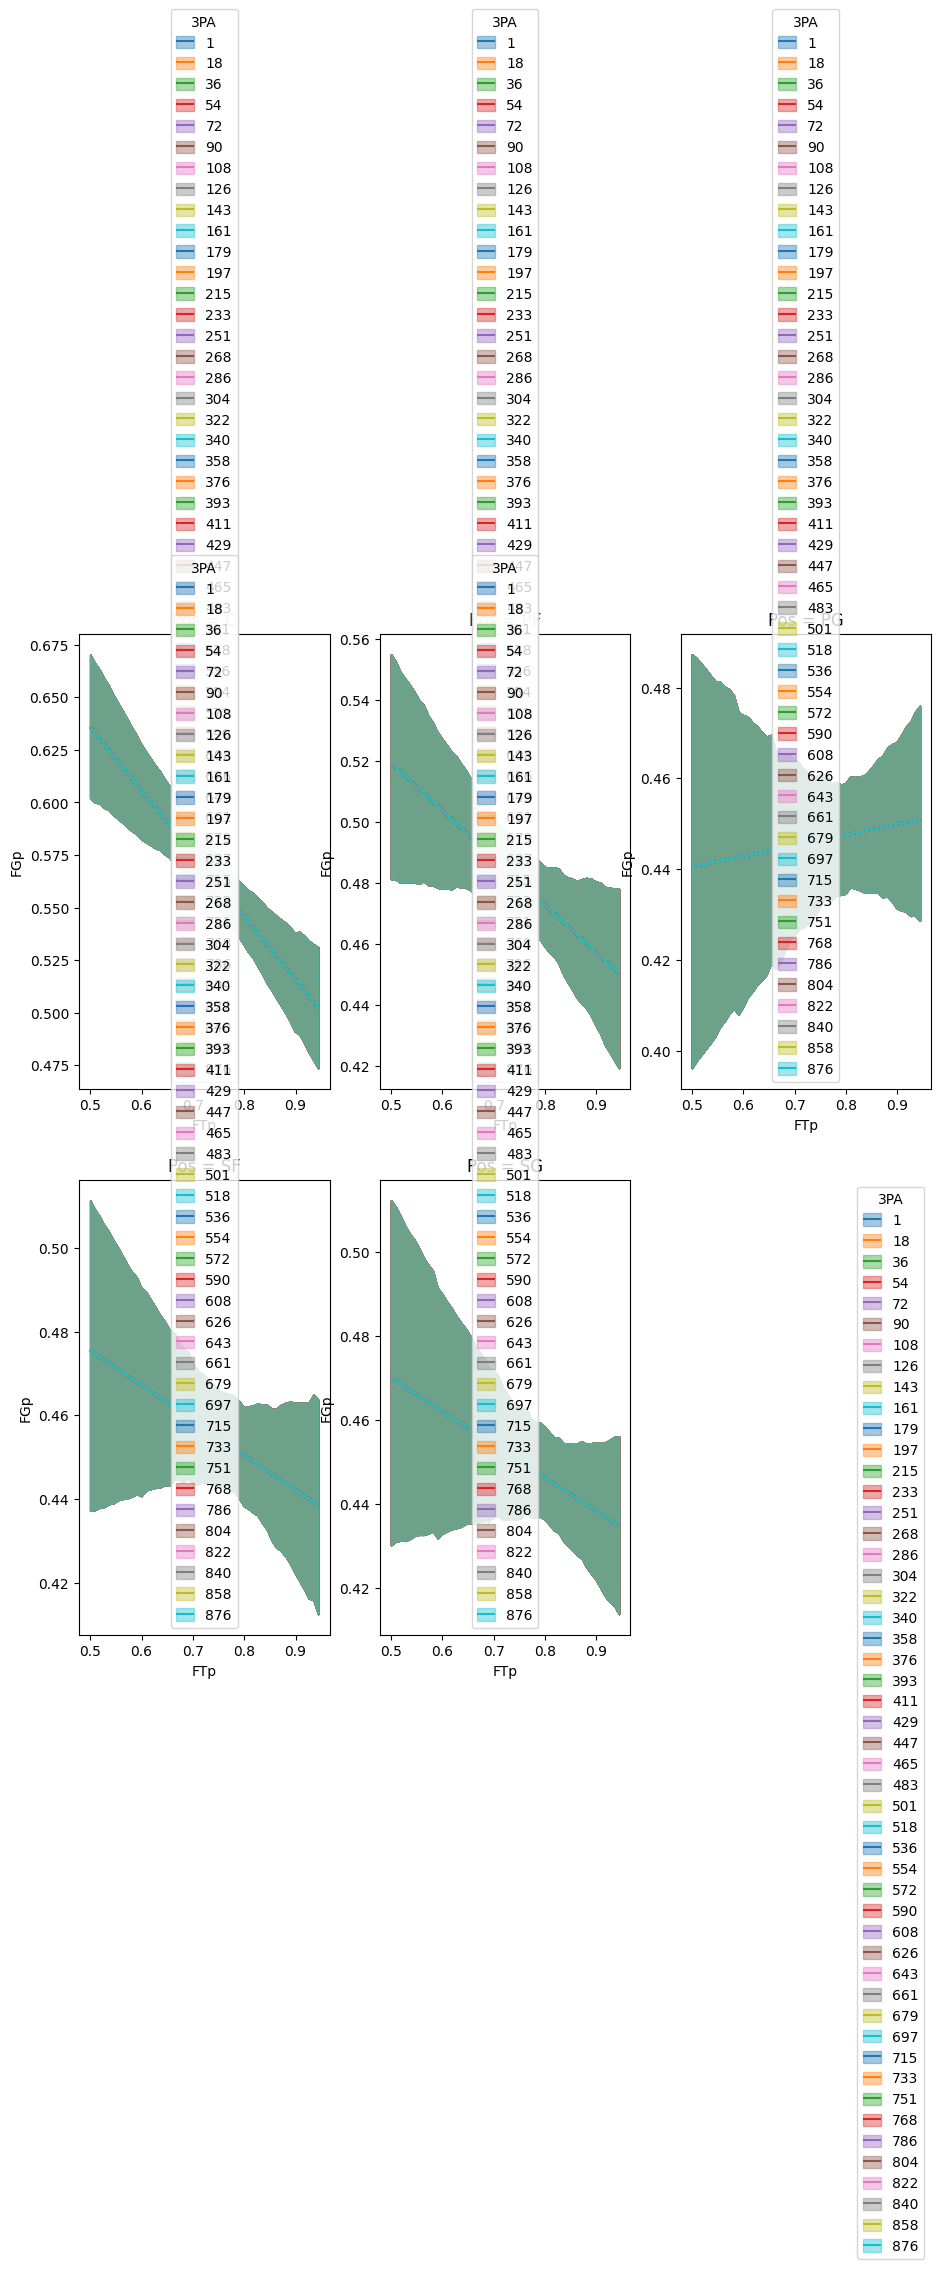

In [15]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

In [ ]:
#predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.
model_bb_5 = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `3PA` : `Pos`", data=bb)
idata_bb_5 = model_bb_5.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

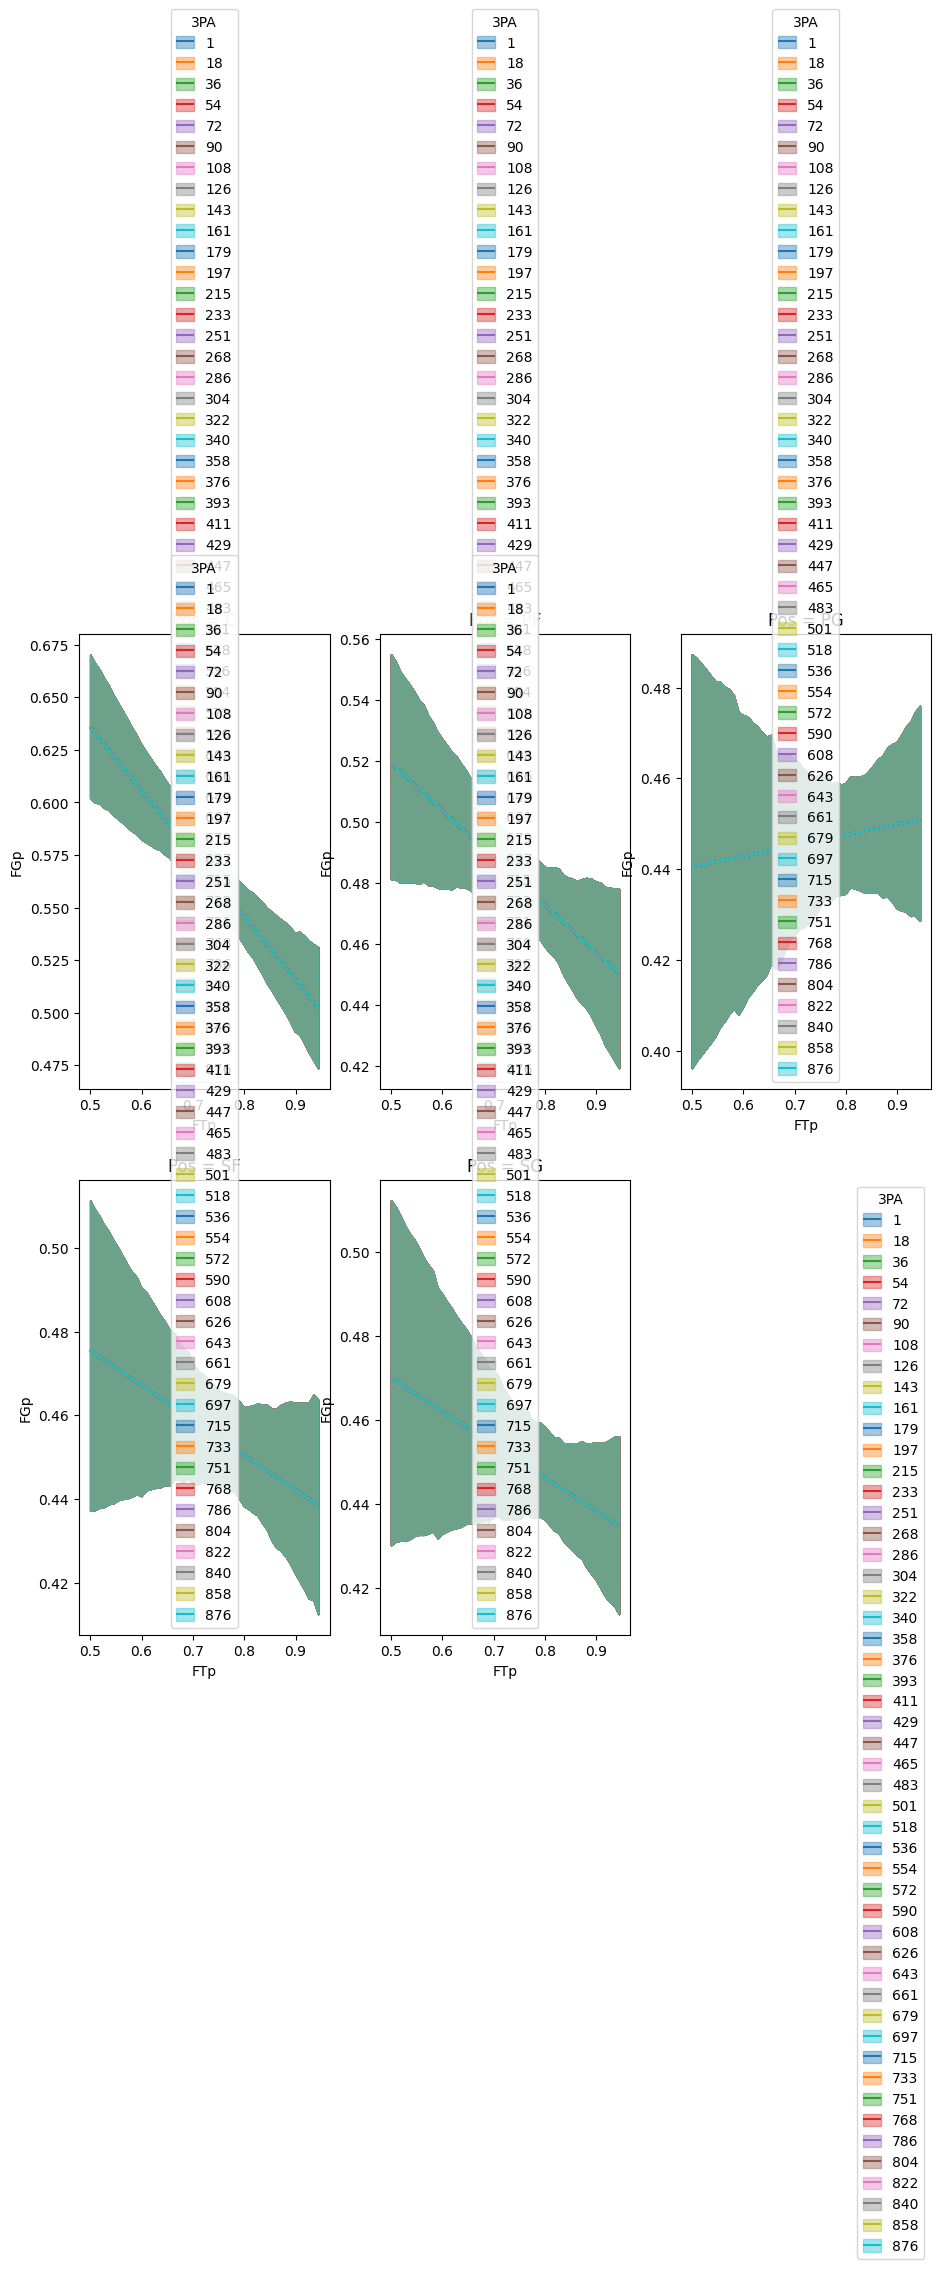

In [17]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

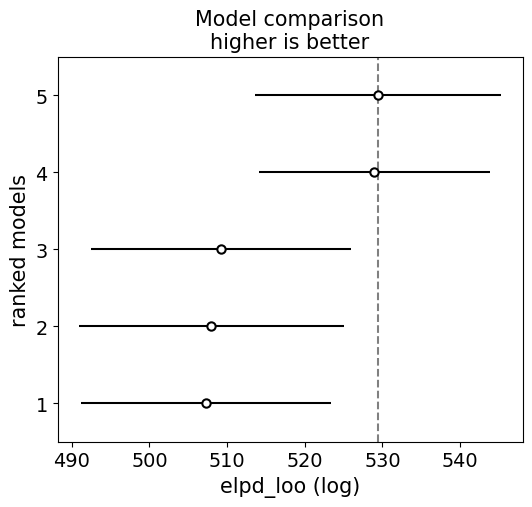

In [18]:
cmp = az.compare({"1":idata_basketball,"2":idata_basketball_h, "3":idata_bb_interq, "4":idata_bb_4, "5": idata_bb_5})
az.plot_compare(cmp)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

Answer11: Based on the elpd_loo metric, model #5, which includes an interaction between 3PA and position, performs the best, slightly better than model #4, which includes interactions between all predictors. These two models likely do better because 3PA and position are meaningfully related, so modeling their interaction adds useful information. In contrast, FTp and position do not appear to have a strong relationship, which makes the interaction in model #3 less effective.

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [19]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [20]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


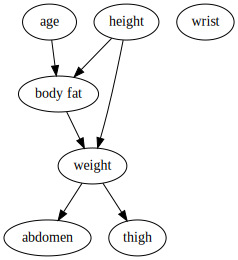

In [23]:
b_dag = gv.Digraph(name="Body DAG")

b_dag.node('F','body fat')
b_dag.node('A','age')
b_dag.node('H','height')
b_dag.node('L','weight')
b_dag.node('S','abdomen')
b_dag.node('T','thigh')
b_dag.node('W','wrist')

b_dag.edges(['AF','FL','LS','LT','HL','HF'])

b_dag


Answer12: I think that weight would be the best variable to predict because you have the most information on it.